In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_house = pd.read_csv('./MachineLearningDS/HousePricing.csv')
print(df_house.head(5))

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1     13  527166040           60        RL          63.0      8402   Pave   
2     38  528112020           20        RL          98.0     11478   Pave   
3     56  528240070           60        RL           NaN      7851   Pave   
4     59  528292020           60        RL           NaN      9505   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   
1   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   
2   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   
3   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0    

In [3]:
print(df_house.keys())

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [4]:
print(df_house[['Total Bsmt SF', 'Gr Liv Area']].isnull().values.any())

False


In [5]:
df_house['Total Area'] = df_house['Total Bsmt SF'] + df_house['Gr Liv Area']
print(df_house[['Total Bsmt SF', 'Gr Liv Area', 'Total Area', 'SalePrice']].head(5))

   Total Bsmt SF  Gr Liv Area  Total Area  SalePrice
0           1080         1656        2736     215000
1            789         1465        2254     180400
2           1704         1704        3408     306000
3            860         1960        2820     216500
4            884         2035        2919     222500


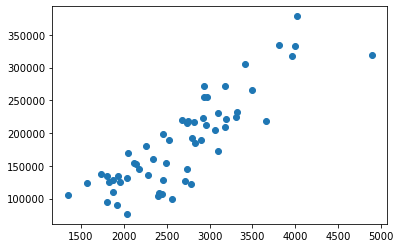

In [6]:
def plotRelation(x:pd.DataFrame, y: pd.DataFrame):
    _x = x.head(200)
    _y = y.head(200)
    plt.scatter(_x, _y)
    plt.show()

plotRelation(df_house['Total Area'], df_house['SalePrice'])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sf_scaled = scaler.fit_transform(df_house['Total Area'].values.reshape(-1, 1).astype(np.float64))
price_scaled = scaler.fit_transform(df_house['SalePrice'].values.reshape(-1, 1).astype(np.float64))

In [8]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(1,), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.compile(loss='mean_squared_error', optimizer="sgd")

In [9]:
from sklearn.model_selection import train_test_split
sf_train, sf_test, price_train, price_test = train_test_split(sf_scaled, price_scaled, test_size=0.3, random_state=42)
inital_epochs = 400
batch_size = 10
train_hist = model.fit(x=sf_train, y=price_train, epochs=inital_epochs, verbose=1, batch_size=batch_size)

poch 156/400
5/5 [==============================] - 0s 800us/step - loss: 0.0235
Epoch 157/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 158/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 159/400
5/5 [==============================] - 0s 1000us/step - loss: 0.0233
Epoch 160/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 161/400
5/5 [==============================] - 0s 800us/step - loss: 0.0230
Epoch 162/400
5/5 [==============================] - 0s 599us/step - loss: 0.0230
Epoch 163/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 164/400
5/5 [==============================] - 0s 800us/step - loss: 0.0229
Epoch 165/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 166/400
5/5 [==============================] - 0s 801us/step - loss: 0.0226
Epoch 167/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 168/400
5/5 [=========

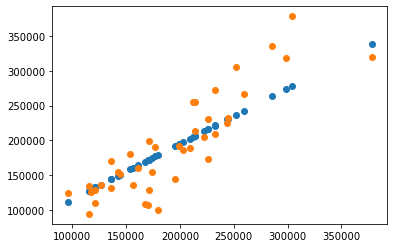

In [10]:
predict_price = model.predict(sf_train)
plt.scatter( scaler.inverse_transform(sf_train), scaler.inverse_transform(predict_price))
plt.scatter( scaler.inverse_transform(sf_train), scaler.inverse_transform(price_train))
plt.show()

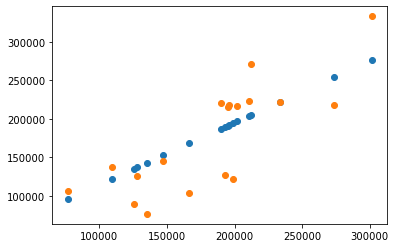

In [11]:
predice_test_data = model.predict(sf_test)
plt.scatter( scaler.inverse_transform(sf_test), scaler.inverse_transform(predice_test_data))
plt.scatter( scaler.inverse_transform(sf_test), scaler.inverse_transform(price_test))
plt.show()

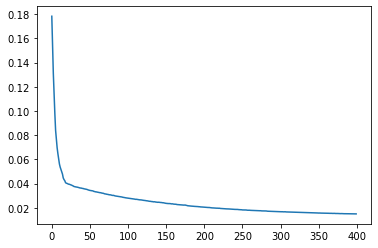

In [12]:
plt.plot(train_hist.history['loss'])
plt.show()